# 1. Fisher's iris dataset

Dimensionality reduction:

$\cdot$ Help with data visualization (e.g. t-SNA method).

$\cdot$ Help deal with the multicollinearity of data and prepare the data for a supervised learning method (e.g. decision trees).

PCA is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace.

In [2]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import warnings
warnings.filterwarnings("ignore")

## Visualization

In [6]:
# Loading the dataset

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


<IPython.core.display.Javascript object>


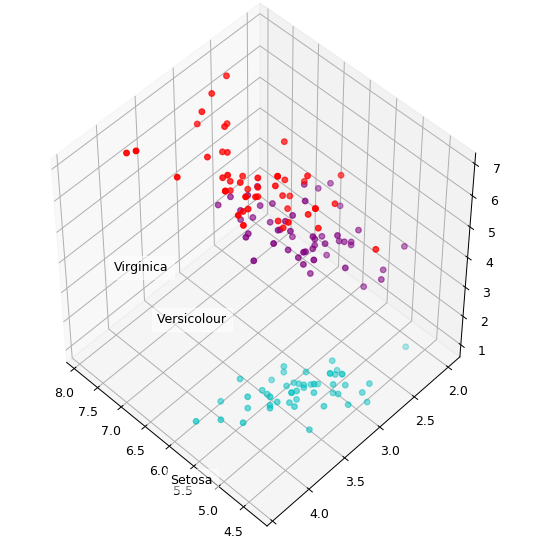

In [7]:
# 3d-plot

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment = 'center',
              bbox = dict(alpha = .5, edgecolor = 'w', facecolor = 'w'))

# Change the order of labels, so that they match

colors = ['r', 'c', 'purple']  # colors
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)  # color labels

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c =  y_clr, 
           cmap = matplotlib.colors.ListedColormap(colors)) 

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.show()

## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    stratify = y, 
                                                    random_state = 128)

print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [9]:
# Decision trees with depth = 2

clf = DecisionTreeClassifier(max_depth = 2, random_state = 128)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)  

print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.93333


## PCA -> Decision Tree

<IPython.core.display.Javascript object>


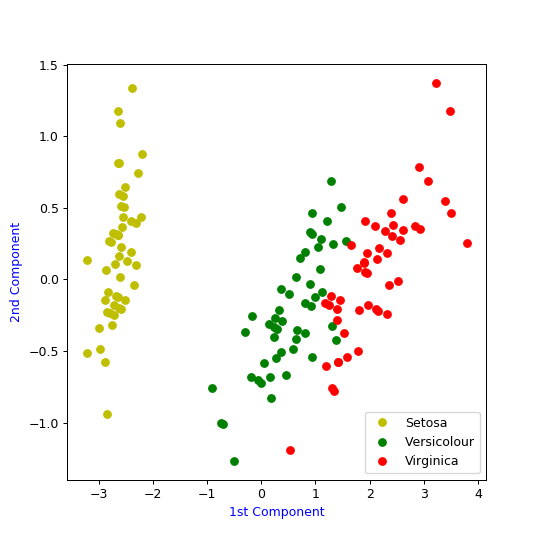

In [10]:
# Using PCA from sklearn PCA

pca = decomposition.PCA(n_components = 2)
X_centered = X - X.mean(axis = 0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered) 

# Plotting the results of PCA

fig = plt.figure(figsize = (6, 6))

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'yo', label = 'Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label = 'Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label = 'Virginica')
plt.legend(loc=0)

plt.xlabel("1st Component", color = 'b')
plt.ylabel("2nd Component", color = 'b')

plt.show()

In [86]:
# Test-train split and apply PCA

# Train, test splits

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = .3, 
                                                    stratify = y, 
                                                    random_state = 128)
# Decision trees with depth = 2

clf = DecisionTreeClassifier(max_depth = 2, random_state = 128)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)  

print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.95556


### Weights

In [11]:
pca.components_  

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

The accuracy did not increase significantly in this case, but, with other datasets with a high number of dimensions, PCA can drastically improve the accuracy of decision trees and other ensemble methods.

###  PVE Interpretation

In [12]:
for i, component in enumerate(pca.components_):
   
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)), '\n')

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm) 

2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm) 



# 2. Digits Dataset

In [19]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(len(X), len(X[1]), len(y))

1797 64 1797


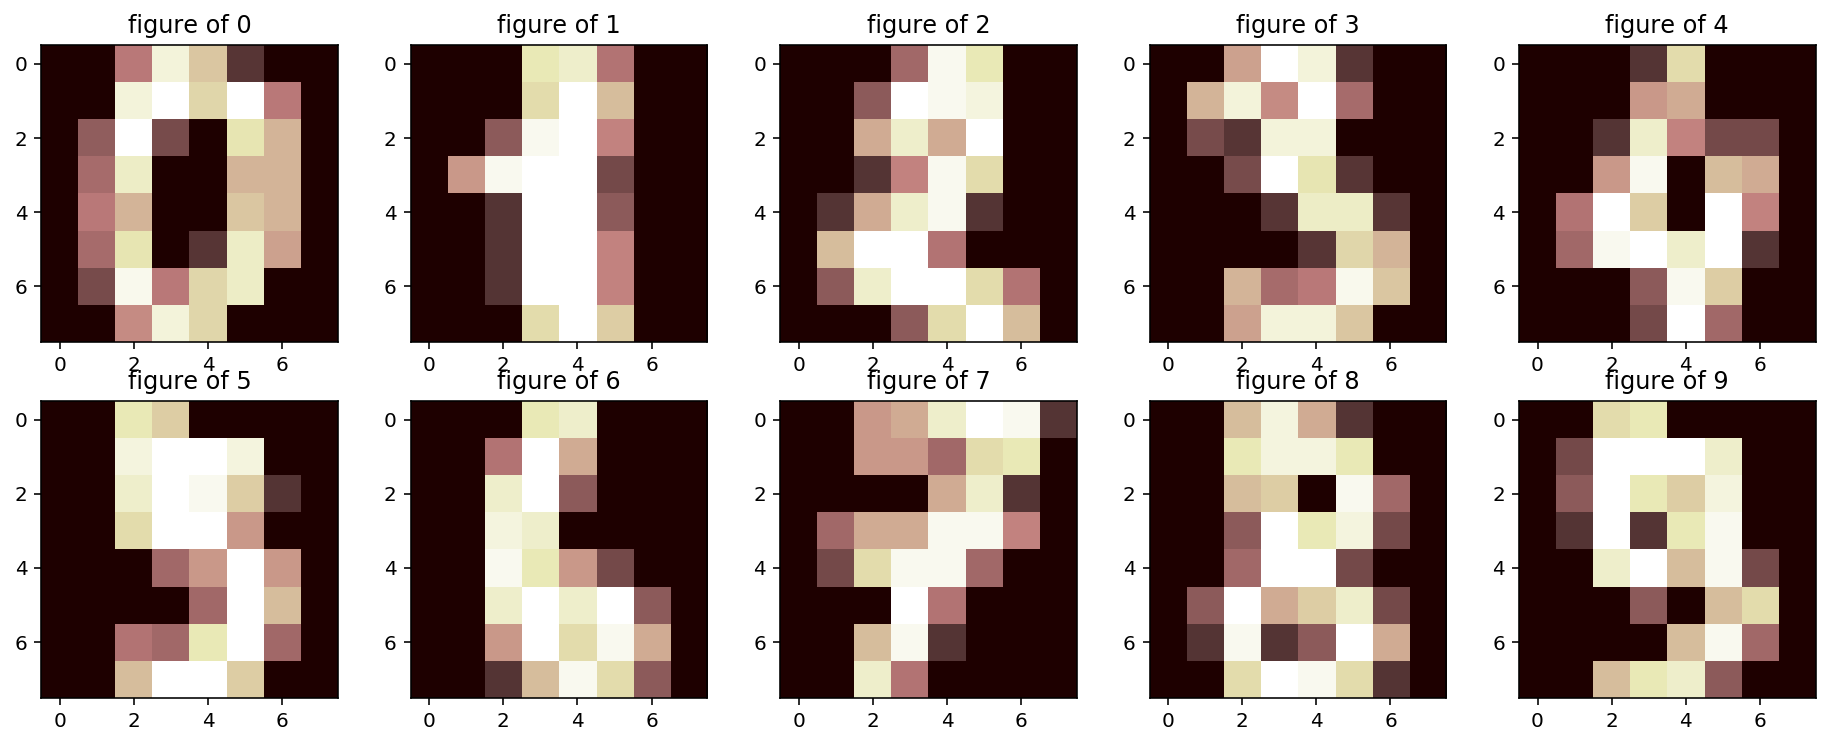

In [30]:
%matplotlib inline

plt.figure(figsize=(16, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap = 'pink')
    title = "figure of " + str(i) 
    plt.title(title)
    

## PCA

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

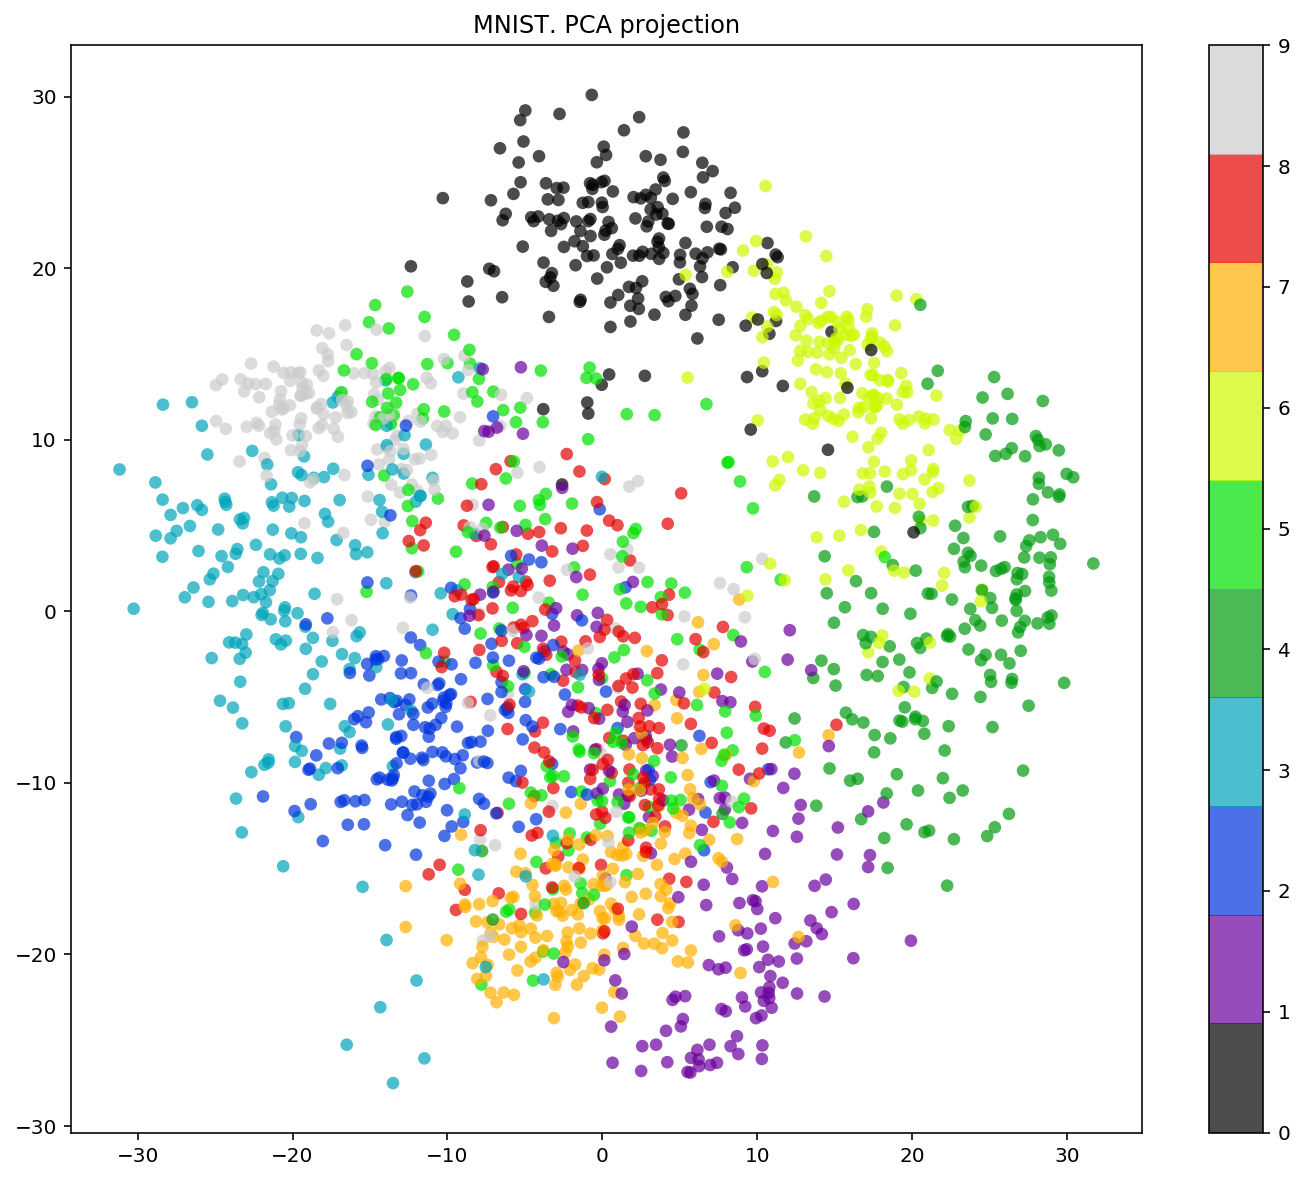

In [33]:
pca = decomposition.PCA(n_components = 2)
X_pca = pca.fit_transform(X)  

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize = (12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, 
            edgecolor = 'none', alpha = 0.7, s = 40,
            cmap = plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.title('MNIST. PCA projection')

## Choose the Number of Principal Components

Choose the number of principal components such that we can explain 90% of the initial data dispersion

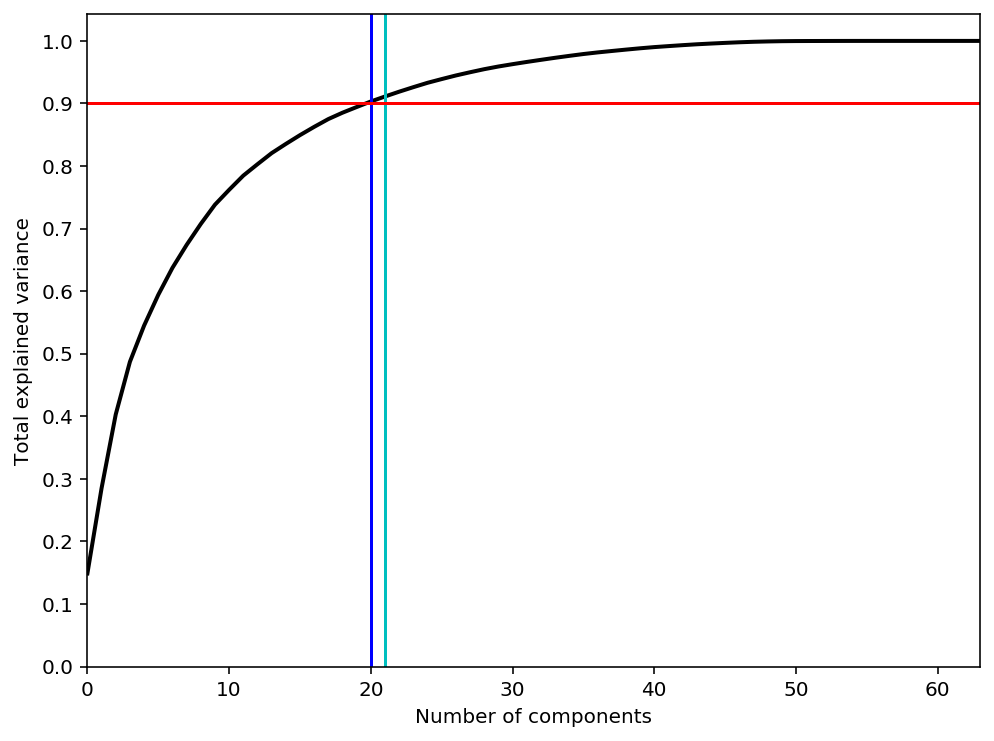

In [38]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize = (8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'k', lw = 2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1)) 

plt.axvline(21, c = 'c') 
plt.axvline(20, c = 'b') 
plt.axhline(0.9, c = 'r')

plt.show()

We can reduce the dimensionality from 64 features to 20.

## t-SNE

In [45]:
import time
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 221)

start = time.time()   # returns in second
X_tsne = tsne.fit_transform(X)
end = time.time()
print("Running time is "+ str(end - start) + " second.")

Running time is 15.21686601638794 second.


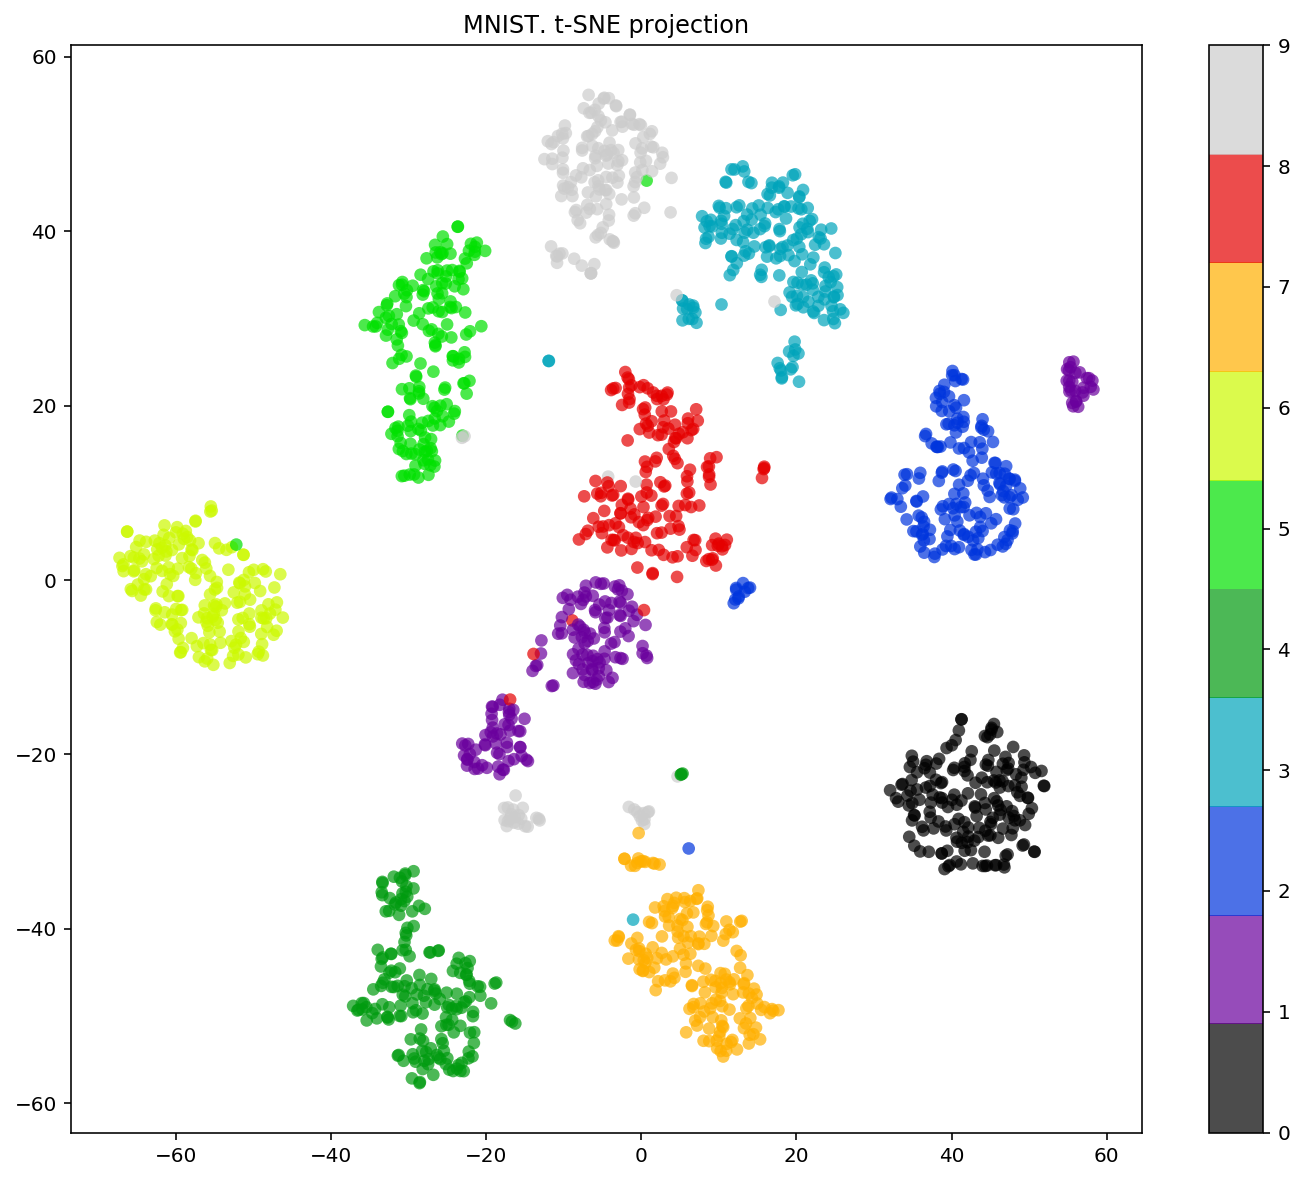

In [46]:
plt.figure(figsize=(12,10))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y, 
            edgecolor = 'none', alpha = 0.7, s = 40,
            cmap = plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.title('MNIST. t-SNE projection');

In [43]:
X_tsne.shape

(1797, 2)

Indeed, with t-SNE, the picture looks better since PCA has a linear constraint while t-SNE does not. However, even with such a small dataset, the t-SNE algorithm takes significantly more time to complete than PCA.